<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Behavioral Analysis and Visualization using Vantage
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Introduction</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Customer behavior varies from industry to industry and company to company, meaning there isn’t one easy solution. Although it seems complex, Teradata Vantage and ClearScape Analytics can bring some clarity to the customers’ behavior. Keep in mind that customer activity can include website click data, healthcare records, or financial data. Users will need to combine all this data to get a full picture of the customers’ experience. Using pathing analytics, businesses can understand the common paths that customers take that lead to a variety of outcomes, such as sales conversion, cart abandonment, or product searches. When businesses use Vantage to analyze all their data at scale, they have the chance to increase customer satisfaction and conversion rates.</p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Business Value</b></p>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Using website click data, users can identify customers’ actions that lead to sales over a specified amount.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>With sensor data from industrial processes, users can identify poor product quality.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Healthcare records of individual patients will help hospitals identify paths that indicate that patients are at risk of developing conditions such as heart disease or diabetes.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'>Using financial data from individual accounts can help identify patterns of fraud or credit risks.</li>
    </p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Why Vantage?</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Vantage has unique analytic capabilities for understanding customer and user behavior over time. In fact, these analytic techniques can be applied at massive scale to derive more accurate results. Then, these results can be combined with other analytics to create more advanced and accurate prediction models. Vantage also allows organizations to scale these models horizontally, by training segmented models per region, user type, etc., or vertically, by combining data from millions or billions of interactions. All of this can be deployed operationally to understand and predict actions in real-time.</p> 
    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
nPath® is useful when your goal is to identify the paths that lead to an outcome. The nPath function scans a set of rows, looking for patterns that you specify. For each set of input rows that matches the pattern, nPath produces a single output row. The function provides a flexible pattern-matching capability that lets you specify complex patterns in the input data and define the values that are output for each matched input set. </p>    


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>1. Connect to Vantage</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press the Enter key, then use down arrow to go to next cell. Begin running steps with Shift + Enter keys.</p>

In [1]:
%connect local, hidewarnings=true

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>


In [2]:
SET query_band='DEMO=Customer_Behavior_Analysis_SQL.ipynb;' UPDATE FOR SESSION;

Success: 1 rows affected

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>2. Getting Data for This Demo</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage.  You have the option of either running the demo using foreign tables to access the data without using any storage on your environment or downloading the data to local storage which may yield somewhat faster execution, but there could be considerations of available storage.  There are two statements in the following cell, and one is commented out.  You may switch which mode you choose by changing the comment string. 


In [3]:
call get_data('DEMO_Retail_cloud');    -- takes about 30 seconds
-- call get_data('DEMO_Retail_local');    -- takes about 50 seconds

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:28.26 with 11 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optional step – if you want to see status of databases/tables created and space used.</p>


In [4]:
call space_report();  -- optional, takes about 10 seconds

Success: 0 rows affected

Success: 0 rows affected

,Space_Report
1,"You have: #databases=3 #tables=5 #views=25 You have used 2.1 MB of 30,678.9 MB available - 0.0% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 4 20 30,144.1 MB 1.9 MB"
5,DEMO_CancerPrediction 0 1 0.0 MB 0.0 MB
6,DEMO_CancerPrediction_db 1 0 534.9 MB 0.3 MB
7,DEMO_Retail 0 4 0.0 MB 0.0 MB


<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>3. Analyze the raw data set</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
Source events data may come from other source systems, log files, Object Storage, etc.  Let us start by analyzing the customer event data.

In [5]:
Select TOP 5 * from DEMO_Retail.Retail_Events;

,entity_id,datestamp,event
1,74613,2018-05-14 02:18:00.000000,Web Chat
2,24409,2018-05-09 04:53:00.000000,Purchase
3,24409,2018-05-09 04:42:00.000000,Web Chat
4,33646,2018-04-09 21:35:00.000000,Store Visit
5,33646,2018-04-14 02:12:00.000000,Return Policy Inquiry


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the sample data we can see the events in the table.

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
In this notebook we will use two powerful behavioral analysis functions available in Vantage:
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>    
 <li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Sessionize</b> Which will group a series of events into a keyed (by number) session.</li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>nPath</b> Sophisticated pattern matching function to analyze and collect data across rows.</li>
</ol>    

<hr style="height:2px;border:none;background-color:#00233C;">

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>4. Sessionize Function</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The Sessionize function maps each click in a session to a unique session identifier. A session is a sequence of clicks by one user that are separated by at most n seconds. The function is useful for both sessionization and detecting web crawler (bot) activity. A typical use is to understand user browsing behavior on a website.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Sessionization is the process of identifying and grouping together all the interactions a user has with a website or application during a single visit, typically based on the user's activity within a certain timeframe, such as prior to 30 minutes of inactivity.
</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Clickstream data refers to the sequence of clicks and other user interactions with a website or application. Sessionization of clickstream data involves analyzing this data to identify each user's session, so you can better understand how users are interacting with the site and make improvements to user experience and engagement.</p>
    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In our case we are taking a duration of 24 hours for our session and observing the user behavior in this time.</p>

In [6]:
Create multiset table demo_sessionized_events as (
SELECT * FROM Sessionize (
 ON DEMO_Retail.Retail_Events
 PARTITION BY entity_id
 ORDER BY datestamp
 USING
 TimeColumn ('datestamp')
 TimeOut (86400)
) )with data;

Success: 0 rows affected

In [7]:
select TOP 5 * from demo_sessionized_events;

,entity_id,datestamp,event,SESSIONID
1,1484,2018-04-14 17:20:00.000000,Service Inquiry,2
2,1484,2018-04-19 13:37:00.000000,Store Visit,4
3,1484,2018-04-15 19:28:00.000000,Neutral Call,3
4,1484,2018-04-13 16:32:00.000000,Product Browsing,1
5,1484,2018-04-12 09:09:00.000000,Web Chat,0


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the data returned above we can see that the function has assigned a sessionid on the events based on the parameter(time_out value) we have given

<hr style="height:2px;border:none;background-color:#00233C;">

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>5. nPath Function</b>


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The nPath function scans a set of rows, looking for patterns that you specify. For each set of input rows that matches the pattern, nPath produces a single output row. The function provides a flexible pattern-matching capability that lets you specify complex patterns in the input data and define the values that are output for each matched input set.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <b> Paths leading to Cancellation.</b><p>
<ol style = 'font-size:16px;font-family:Arial'>
    <li>Pass the sessionized data by reference.</li>
    <li>Provide partitioning (session key) and ordering columns.</li>
    <li>Mode <b>OVERLAPPING</b> vs. <b>NONOVERLAPPING</b>
        <ul style = 'font-size:16px;font-family:Arial'>
            <li><b>OVERLAPPING</b> finds every occurrence of the match, regardless of the current row being part of a previous match.</li>
            <li><b>NONOVERLAPPING</b> starts matching again at the row that follows the previous match.
        </ul>
    </li>
    <li>Symbols.  Create a set of column expression aliases that can be assembled into a pattern to match.
        <ul style = 'font-size:16px;font-family:Arial'>
            <li>Example: "EVENT = 'Mem Purchase' as P" will alias a match on the EVENT column when the content equals 'Mem Purchase'.</li>
        </ul>
    </li>
      <li>Pattern.  Compose a pattern to search for across the rows of events.  This pattern is composed of Symbols and directives.
        <ul style = 'font-size:16px;font-family:Arial'>
            <li>Example: '^P' uses a directive ^ to indicate the P Symbol must occur at the beginning of the group of rows</li>
        </ul>
    </li>
    <li>Result.  Since nPath emits a single row per group-of-row matches, Result indicates what columns make up this row and how to aggregate the data.</li>
    </ol>
    

In [8]:
Create multiset table nPath_mem_cancel as (
SELECT * FROM NPATH
    (ON demo_sessionized_events
        PARTITION BY sessionid
        ORDER BY datestamp
    USING
        MODE (NONOVERLAPPING)
        SYMBOLS (True as A ,event IN ('Mem Cancel') AS B)
        PATTERN ('A{2,5}.B')
        RESULT (FIRST (entity_id OF A) AS entity_id, 
                FIRST (sessionid OF A) AS sessionid, 
                ACCUMULATE (cast(event as VARCHAR(50) CHARACTER SET UNICODE NOT CASESPECIFIC) OF ANY(A,B)) AS path, 
                COUNT (* OF ANY (A,B)) AS event_cnt)
    )) with data;

Success: 0 rows affected

In [9]:
select TOP 5 * from nPath_mem_cancel;

,entity_id,sessionid,path,event_cnt
1,173090,0,"[Product Browsing, Product Browsing, Product Browsing, Product Browsing, Product Browsing, Mem Cancel]",6
2,28741,0,"[Return Policy Inquiry, Return Policy Inquiry, Return Policy Inquiry, Return Policy Inquiry, Return Policy Inquiry, Mem Cancel]",6
3,41544,0,"[Service Inquiry, Return Policy Inquiry, Return Policy Inquiry, Return Policy Inquiry, Return Policy Inquiry, Mem Cancel]",6
4,30479,0,"[Neutral Call, Complaint Call, Complaint Call, Complaint Call, Neutral Call, Mem Cancel]",6
5,71794,0,"[Return Policy Inquiry, Product Return, Product Return, Purchase, Purchase, Mem Cancel]",6


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
Here we can clearly see that the nPath function has created a Path the customer took to the final event that is cancellation of the membership(Mem Cancel) as we have mentioned in the function.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <b> Paths leading to Purchase.</b><p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Since nPath emits a single row per match, it greatly reduces the number of rows returned from the function call.  Below we construct the statement to match sessions where either 'Membership Purchase' or 'Product Purchase' occurred after a series of prior actions of at least one action and no more than five actions:
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>    
   <li style = 'font-size:16px;font-family:Arial;color:#00233C'>Create Three Symbols:
       <ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
           <li style = 'font-size:16px;font-family:Arial;color:#00233C'>MP: Membership Purchase</li>
           <li style = 'font-size:16px;font-family:Arial;color:#00233C'>PP: Product Purchase</li>
           <li style = 'font-size:16px;font-family:Arial;color:#00233C'>A: Match any row not Membership Purchase or Product Purchase</li>
       </ul>
    </li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'>Assemble the Symbols into a Pattern using directives to match any A event between one and five times preceding MP OR PP:
        <ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
            <li style = 'font-size:16px;font-family:Arial;color:#00233C'> A{1,5}.(PP|MP)</li>
        </ul>
    </li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'>Return the sessionid, path, and number of steps</li>
    </ol>

In [10]:
SELECT TOP 5 * FROM NPATH
    (ON demo_sessionized_events
        PARTITION BY sessionid
        ORDER BY datestamp
    USING
        MODE (NONOVERLAPPING)
        SYMBOLS (event = 'Purchase' AS PP, event = 'Mem Purchase' AS MP, event NOT IN ('Purchase', 'Mem Purchase') AS A)
        PATTERN ('A{1,5}.(PP|MP)')
        RESULT (FIRST (datestamp of A) as start_time, 
                FIRST (entity_id of A) as entity_id, 
                FIRST (sessionid of ANY(MP, A, PP)) as sessionid, 
                COUNT (* of ANY(MP, A, PP)) as event_cnt, 
                ACCUMULATE (cast(event as VARCHAR(50) CHARACTER SET UNICODE NOT CASESPECIFIC) of ANY(MP, A, PP)) as path)
    );

,start_time,entity_id,sessionid,event_cnt,path
1,2018-03-18 14:58:00.000000,107462,4,2,"[Mem Cancel, Mem Purchase]"
2,2018-03-11 23:08:00.000000,14759,0,6,"[Neutral Call, Neutral Call, Neutral Call, Complaint Call, Product Return, Purchase]"
3,2018-03-12 13:49:00.000000,104013,0,2,"[Product Return, Purchase]"
4,2018-03-19 21:04:00.000000,110667,4,2,"[Mem Cancel, Mem Purchase]"
5,2018-03-14 10:13:00.000000,6673,1,6,"[Web Chat, Web Chat, Web Chat, Web Chat, Product Return, Purchase]"


<p style = 'font-size:16px;font-family:Arial;color:#00233C'> Here, we can see that the nPath function calculates and displays the path customer took to our final event (Purchase or Mem Purchase) as mentioned in the Pattern parameter of the function.

<hr style="height:2px;border:none;background-color:#00233C;">

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>6. Analysis and Visualization</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> We can perform analysis on the data in-database and visualize the results by plotting the graphs and paths</p>

In [11]:
select event_cnt, count(*) as count_sessionid from nPath_mem_cancel group by 1 order by 2 desc;

,event_cnt,count_sessionid
1,6,1742
2,5,349
3,3,163
4,4,157


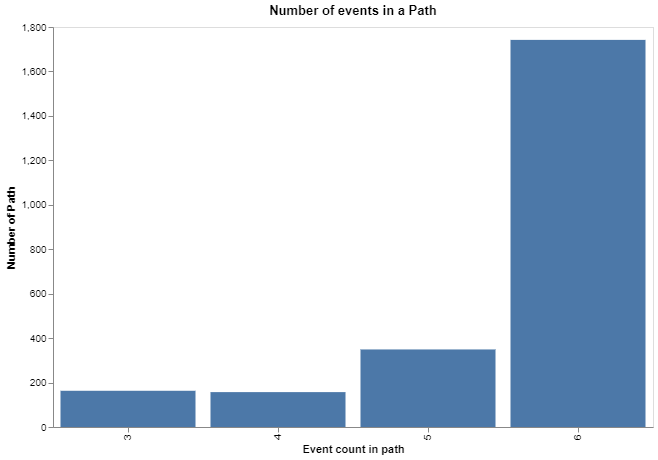

In [12]:
%chart x=event_cnt, y=count_sessionid, gridx=false, gridy=false, mark=bar, title="Number of events in a Path", width=600, height=400, labelx="Event count in path", labely="Number of Path" , typex=o

<p style = 'font-size:16px;font-family:Arial;color:#00233C'> In our nPath function we have used the pattern where final event is 'Mem Cancel', The above histogram shows the number of events where the final event is Mem Cancel.

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>5.1  Sankey Charts</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'> In order to visualize the distribution of the different path of events, we typically use Sankey diagram of the aggregated over the paths reported by the NPATH command.</p>


<p style = 'font-size:16px;font-family:Arial;'>A visualization of this gives us lots of insight into the most common paths that lead to purchase of membership. This is an SQL notebook and we have another Notebook for same usecase which has python code for visualizations. A Sankey Diagram was created using the output of the nPath® function used in the query above and below is the image for the nPath® function.</p>

<img  src="images/nPath_output.png"/>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'> The dark green path at the TOP Product Return ---> Purchase.<br>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'> This visualization takes the input from Teradata nPath output. Here also we can see the events customer took to his final event of 'Purchase' or 'Mem Purchase'(membership purchase). </p>


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Conclusion</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Thus, with Teradata Vantage and ClearScape Analytics we can bring some clarity to the complex analysis of customers’ behavior. Using pathing analytics, we can understand the common paths that customers take that lead to a variety of outcomes, such as sales conversion, cart abandonment, or product searches. Using Vantage to analyze all our data at scale, we have the chance to increase customer satisfaction and conversion rates.</p>

<hr style="height:2px;border:none;background-color:#00233C;">

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>7. Cleanup</b></p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b>Work tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We need to clean up our work tables to prevent errors next time.</p>

In [13]:
drop table nPath_mem_cancel;

Success: 17 rows affected

In [14]:
drop table demo_sessionized_events;

Success: 17 rows affected

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Database and Tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will use the following code to clean up tables and databases created for this demonstration.</p>

In [15]:
call remove_data('DEMO_Retail');-- takes about 10 seconds, optional if you want to use the data later

Success: 0 rows affected

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_Retail. That ran for 0:00:09.00


<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Required Materials</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let’s look at the elements we have available for reference for this notebook:</p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
   <li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/reader/CWVY0AJy8wyyf7Sm0EsK~w/wjkE42ypEfeMkRFOIqVXfQ'>Teradata nPath Function Reference</a></li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://docs.teradata.com/rear/CWVY0AJy8wyyf7Sm0EsK~w/RNbOiUg9~r~cxSZHrR~sFQ'>Teradata Sessionize Function Reference</a></li>
        
</ul>


<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Filters: </b></p>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Industry:</b> Retail</li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Functionality:</b> Path Analytics</li>
    <li style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Use Case:</b> Digital Customer Conversion</li></p>
    <p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Related Resources:</b></p>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://teradata.seismic.com/Link/Content/DCGBP9J9gjD288TPcG3HFgXDHDW8'>Broken Digital Journeys CX Solution Accelerator Demo via Python Video - External - SP004183</a></li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://www.teradata.com/Blogs/Customer-360-Analytics-What-Lies-Ahead'>Customer 360 Analytics, What Lies Ahead?</a></li>
<li style = 'font-size:16px;font-family:Arial;color:#00233C'><a href = 'https://www.teradata.com/Trends/Data-Analytics#:~:text=Data%20Analytics-,Royal%20Bank%20of%20Canada%20Deepens%20the%20Customer%20Experience,-Data%20Analytics'>Royal Bank of Canada Deepens the Customer Experience</a></li>


<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            © 2023, 2024 Teradata. All rights reserved.
        </div>
    </div>
</footer>